In [70]:
import keras
import numpy as np
from PIL import Image

In [71]:
model = keras.models.load_model('best-model.keras')

In [72]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49)             │         6,321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,560,440 (17.40 MB)

 Trainable params: 170,289 (665.19 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 340,580 (1.30 MB)

In [74]:
categories = np.load("category.npy")
categories

array(['aircraft carrier', 'airplane', 'alarm clock', 'ambulance',
       'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm',
       'asparagus', 'axe', 'backpack', 'banana', 'barn', 'baseball bat',
       'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach',
       'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle',
       'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry',
       'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain',
       'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer',
       'The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa'],
      dtype='<U23')

In [80]:
image = np.invert(np.array(Image.open("sample.jpg").resize((224, 224))))

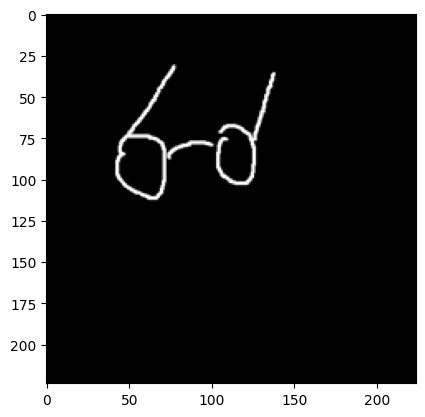

In [81]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [92]:
predictions = model.predict(image[np.newaxis, :, :, :])[0]
#print(np.round(predictions, decimals=3))

indexes = np.argsort(predictions).tolist()
indexes.reverse()
indexes = indexes[:5]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [93]:
indexes

[37, 5, 11, 35, 19]

In [102]:
items = np.column_stack((categories[indexes], predictions[indexes]))
items


array([['bowtie', '0.34363237'],
       ['animal migration', '0.11565708'],
       ['axe', '0.07479226'],
       ['boomerang', '0.06776418'],
       ['bat', '0.042624768']], dtype='<U32')